 Temperature not specified!
 Proceeding with default T = 300 K


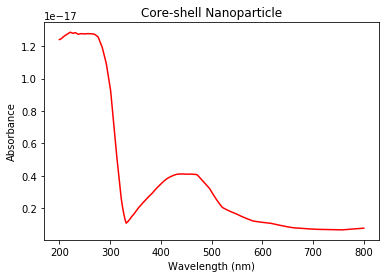

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np
import math


structure = {

        'Material_List': ['Air', 'Au', 'Ag', 'Air'],
        'Thickness_List': [0, 200e-9,  200e-9, 0],
        'Lambda_List': [200e-9, 800e-9, 2000],
     
        }

### create the silver object - call it sphere for no particular reason
sphere = multilayer(structure)

### get the refractive index of Au (since it is layer 1 based on the structure above)
n_Au = sphere.layer_ri(1)
### get the dielectric function of Au- Core
eps_1 = n_Au * n_Au
#eps_1 = 1.55*1.55
### get the refractive index of Ag (since it is layer 2 based on the structure above)
n_Ag = sphere.layer_ri(2)
### get the dielectric function of Ag- shell 
eps_2 = n_Ag * n_Ag
'''Lets compute the Mie theory absorption of a 7 nm Au shell and 10 nm core-shell particle in water, which 
   has refractive index = 1.33, here!'''

r1 = 7e-9 ### fill in radius here, use meters!
### making r2 smaller... r2 is the total radius of the core-shell particle
r2 = 10e-9 
### eps_s =  1.33 ### fill in dielectric function of water here!
P = 1 - (r1/r2)**3
eps_3 = 1.33
eps_a = eps_1*(3-P) + 2*eps_2*(P) 
eps_b = eps_1*(P) + eps_2*(3-P) 
quotient = (eps_2*eps_a - eps_3*eps_b)/(eps_3*eps_a + 2*eps_3*eps_b) ##e quotient whose Imaginary part you need from Mie theory expression here
pre = 8*np.pi* (math.sqrt(eps_3)) * r2**2 / (sphere.lambda_array*1e9) ### compute pre-factor that depends on wavelength and radius here!
sigma_abs = np.imag(quotient) * pre ### compute full absorption spectrum here!
 
plt.plot(sphere.lambda_array*1e9, sigma_abs, 'red')
plt.title('Core-shell Nanoparticle')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.show()
